# Binary Classification Threshold Tuning

In this notebook we'll use another dataset to look at threshold tuning. We won't fall into the same trap as before and start retraining a model without a validation and test-set, but train one model and keep on using that.

## Import data and create model

You did this before, so the following code should give no surprises.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]

## The ROC-curve

Plot the ROC-curve agian.

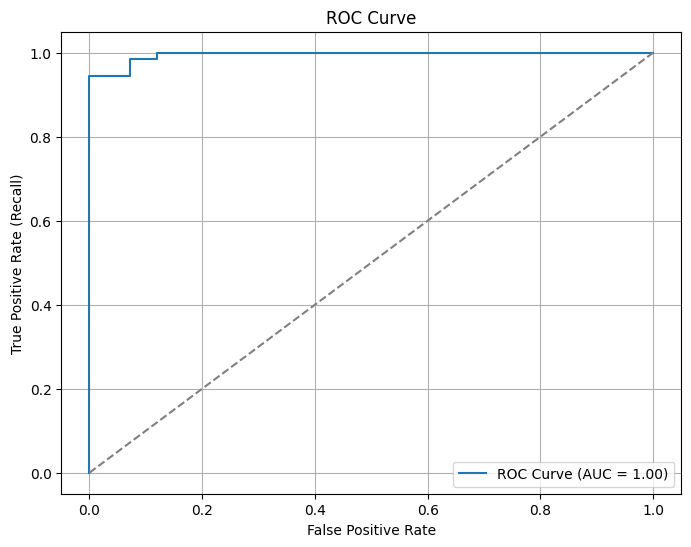

In [3]:
#DELETE
fpr, tpr, roc_thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

This is a very good ROC-curve. The area under the curve is 1, which means the model is nearly perfect. But even so (perhaps especially so) it's a good idea to investigate which threshold is best for our use case.

Start with the following function.

In [12]:
# Function to evaluate threshold
def evaluate_threshold(threshold):
    y_pred_thresh = (probs >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    print(f"\nThreshold: {threshold:.2f}")
    # print("Confusion Matrix:")
    print(cm)
    print(f"Sensitivity (Recall): {sensitivity:.3f}")
    print(f"Specificity:          {specificity:.3f}")
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred_thresh))


Try the following thresholds:

.15, .3, .5, .7, .9

In [13]:
#DELETE
# Try a few thresholds
for t in [.15, .3, .5, .7, .9]:
    evaluate_threshold(t)


Threshold: 0.15
[[37  5]
 [ 0 72]]
Sensitivity (Recall): 1.000
Specificity:          0.881

Threshold: 0.30
[[38  4]
 [ 1 71]]
Sensitivity (Recall): 0.986
Specificity:          0.905

Threshold: 0.50
[[39  3]
 [ 1 71]]
Sensitivity (Recall): 0.986
Specificity:          0.929

Threshold: 0.70
[[39  3]
 [ 4 68]]
Sensitivity (Recall): 0.944
Specificity:          0.929

Threshold: 0.90
[[42  0]
 [11 61]]
Sensitivity (Recall): 0.847
Specificity:          1.000


(you can uncomment the confusion matrix or the full report in the function if you'd like.) When you scroll through you'll notice how the precision goes down and the recall (or sensitivity) goes up. Remember we are working with a breast cancer dataset. We don't want to leave that untreated, but the treatment is also nothing to look forward to.

* Threshold 0.15: No false positives, 5 false negatives.
    * We won't start treating anybody who's not sick, but we send 5 women home without treatment.
* ...
* Threshold 0.90: 11 false positives, no false negatives.
    * We'll treat 11 healthy people, but nobody goes home with cancer.

Luckily this is not a decision an IT'er should make. It is something that should be well worked over with people who have a medical background (domain specialists, in other words).